### Programming Session Week 3

In this session we will continue to work on regression and we will extend our toolbox to include an additional set of classification methods. 

### Exercise 1

#### Exercise 1.a

The model below was generated using a degree 2 polynomial. Study the evolution of the MSE for various degrees from 1 to 5 and by generating your training and test sets as noisy samples from the true quadratic function. Use $K$-fold cross validation to retrieve the correct model complexity out the possible maximum degrees.

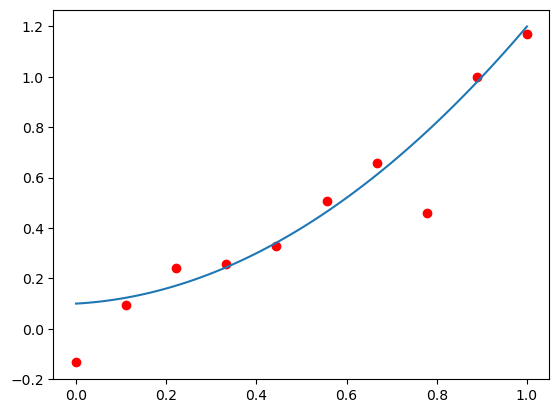

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x_true = np.linspace(0,1,100)
x_sample = np.linspace(0,1,10)
t_true = 0.1 + 0.1*x_true + x_true**2
t_sample = 0.1 + 0.1*x_sample + x_sample**2
t_sample = t_sample + np.random.normal(0,.1,len(x_sample))

plt.plot(x_true, t_true)
plt.scatter(x_sample, t_sample, c='r')
plt.show()


### Exercise 2

#### Exercise 2.a

Using the OLS loss, try to learn a classifier for the dataset given below. 

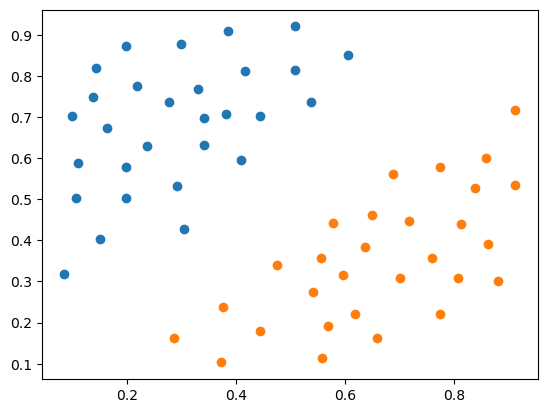

In [3]:

import scipy.io
import matplotlib.pyplot as plt

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex1.mat')['points_class1_Lab2_Ex1']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex1.mat')['points_class2_Lab2_Ex1']

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.show()

In [7]:
t1 = np.ones((data_class1.shape[0],1))
t2 = -np.ones((data_class2.shape[0],1))

t = np.vstack((t1,t2))
data = np.vstack((data_class1,data_class2))
print(data)
print(t)

[[0.14228111 0.81824818]
 [0.0985023  0.70145985]
 [0.16301843 0.67226277]
 [0.21831797 0.77445255]
 [0.13767281 0.74817518]
 [0.10541475 0.50291971]
 [0.23675115 0.62846715]
 [0.14919355 0.40364964]
 [0.08467742 0.3189781 ]
 [0.30357143 0.4270073 ]
 [0.19758065 0.50291971]
 [0.19758065 0.57883212]
 [0.34043779 0.63138686]
 [0.29896313 0.87664234]
 [0.27592166 0.73649635]
 [0.41647465 0.81240876]
 [0.38421659 0.90875912]
 [0.50864055 0.92043796]
 [0.50864055 0.81532847]
 [0.44412442 0.70145985]
 [0.32891705 0.76861314]
 [0.29205069 0.53211679]
 [0.60541475 0.85036496]
 [0.53629032 0.73649635]
 [0.11002304 0.58759124]
 [0.19758065 0.87372263]
 [0.40956221 0.59635036]
 [0.38191244 0.70729927]
 [0.34043779 0.69854015]
 [0.28513825 0.16131387]
 [0.44412442 0.17883212]
 [0.47407834 0.33941606]
 [0.375      0.23722628]
 [0.37269585 0.10291971]
 [0.55702765 0.11459854]
 [0.63536866 0.38321168]
 [0.54089862 0.27518248]
 [0.57776498 0.44160584]
 [0.71601382 0.44744526]
 [0.69988479 0.30729927]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data, t.ravel(), test_size=0.2, random_state=42)
model = LogisticRegression() # linear regression
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([ 1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.])

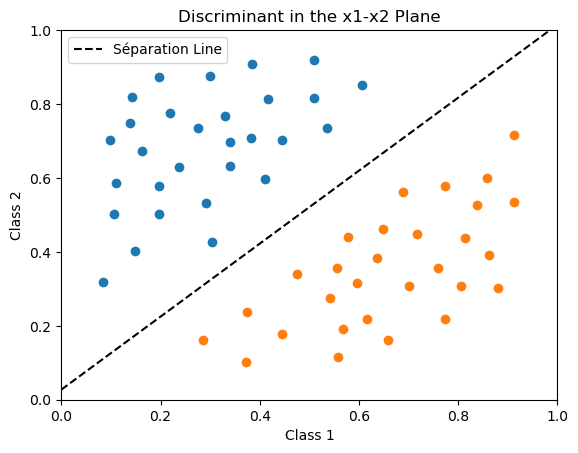

In [15]:

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
w0 = model.intercept_[0]
w1, w2 = model.coef_[0]


x1_vals = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)

x2_vals = -(w0 + w1 * x1_vals) / w2


plt.plot(x1_vals, x2_vals, 'k--', label='Séparation Line')

plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Discriminant in the x1-x2 Plane')
plt.xlabel('Class 1')
plt.ylabel('Class 2')

plt.show()

#### Exercise 2.b

How could you extend your classifier to the dataset shown below.

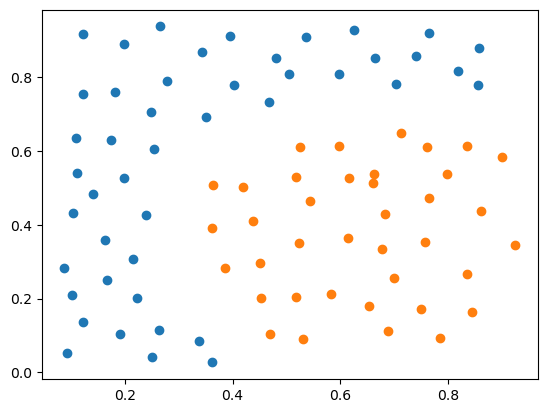

In [13]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex2.mat')['points_class1_Lab2_Ex2']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex2.mat')['points_class2_Lab2_Ex2']

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso


t1 = np.ones((data_class1.shape[0], 1))  # Classe 1
t2 = -np.ones((data_class2.shape[0], 1))  # Classe 2

data = np.vstack((data_class1, data_class2))  # Données d'entraînement
t = np.vstack((t1, t2)).ravel()  # Cibles associées (aplati pour sklearn)

degree = 7
poly_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1)) # Ridge lasso 
# poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # Ridge lasso 

# Entraîner le modèle
poly_model.fit(data, t)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('lasso', Lasso(alpha=0.1))])

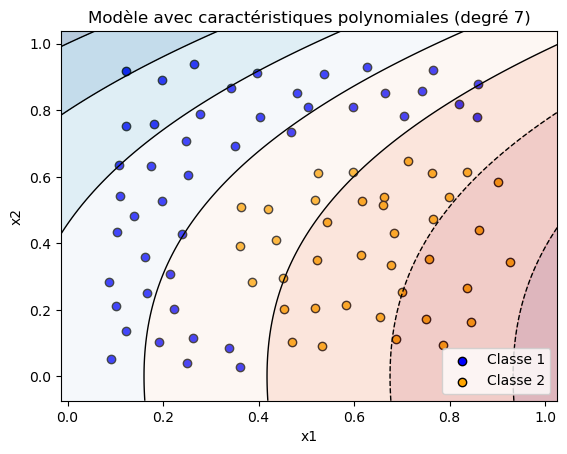

In [24]:
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue', edgecolor='k', label='Classe 1')
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='orange', edgecolor='k', label='Classe 2')

# Création d'une grille de points pour représenter la frontière de décision
x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Prédire pour chaque point de la grille avec les nouvelles caractéristiques polynomiales
Z = poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Afficher la frontière de décision non linéaire
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.contour(xx, yy, Z, colors='k', linewidths=1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title(f'Modèle avec caractéristiques polynomiales (degré {degree})')
plt.show()

#### Exercise 2.c

We now want to use the OLS to learn a multi-class classifier for the dataset below. Start by coding the one-vs-one and one-vs-rest classifiers. Then use the a single 
 discriminant function with one hot encoding of the classes.
    

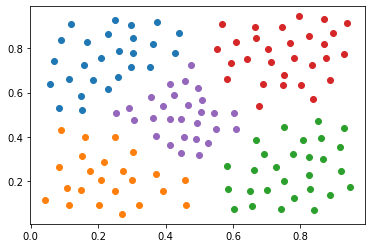

In [5]:
import scipy.io
import matplotlib.pyplot as plt

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex3.mat')['points_class1_Lab2_Ex3']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex3.mat')['points_class2_Lab2_Ex3']
data_class3 = scipy.io.loadmat('points_class3_Lab2_Ex3.mat')['points_class3_Lab2_Ex3']
data_class4 = scipy.io.loadmat('points_class4_Lab2_Ex3.mat')['points_class4_Lab2_Ex3']
data_class5 = scipy.io.loadmat('points_class5_Lab2_Ex3.mat')['points_class5_Lab2_Ex3']



plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.scatter(data_class3[:,0], data_class3[:,1])
plt.scatter(data_class4[:,0], data_class4[:,1])
plt.scatter(data_class5[:,0], data_class5[:,1])
plt.show()

### Exercise 3. 

#### Exercise 3.a 

Use the OLS classifier from scikit-learn to classify the flowers from the [iris dataset](https://www.kaggle.com/uciml/iris) into the 3 species. Don't forget to split your dataset into a training and a test part so that you evaluate it properly once it has been trained (you can rely on scikit learn's train_test_split function)
    

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



#### Exercise 3.a 
Do the same with the [https://www.kaggle.com/c/titanic](titanic dataset) and try to learn a model that can efficiently predict which passengers are going to survive the wreck. 

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



### Exercise 4. 

#### Exercise 4.a 

In this 4th exercise, we will study the robustness of the OLS approach for classification. Consider the dataset below. 

- Start by learning a simple binary OLS classifier on that dataset (you can use the linear_regression model from scikit-learn). 
- Then try to force misclassification by adding a blue point on the far left of the dataset. 
- Once your updated dataset can be used to highlight misclassification by the OLS, replace the OLS classifier with the logistic regression classifier from scikit learn (on the same dataset). What do you notice ?


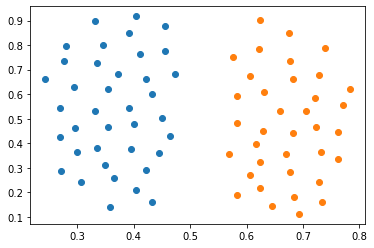

In [16]:

import scipy.io
import matplotlib.pyplot as plt

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex4.mat')['points_class1_Lab2_Ex4']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex4.mat')['points_class2_Lab2_Ex4']

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.show()